In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Replace with your actual file path if different
df = pd.read_csv("../data/raw/data.csv")  


In [5]:
print("Shape of dataset:", df.shape)
df.head()
df.dtypes
df.describe()
df.describe(include='object')


Shape of dataset: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [6]:
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

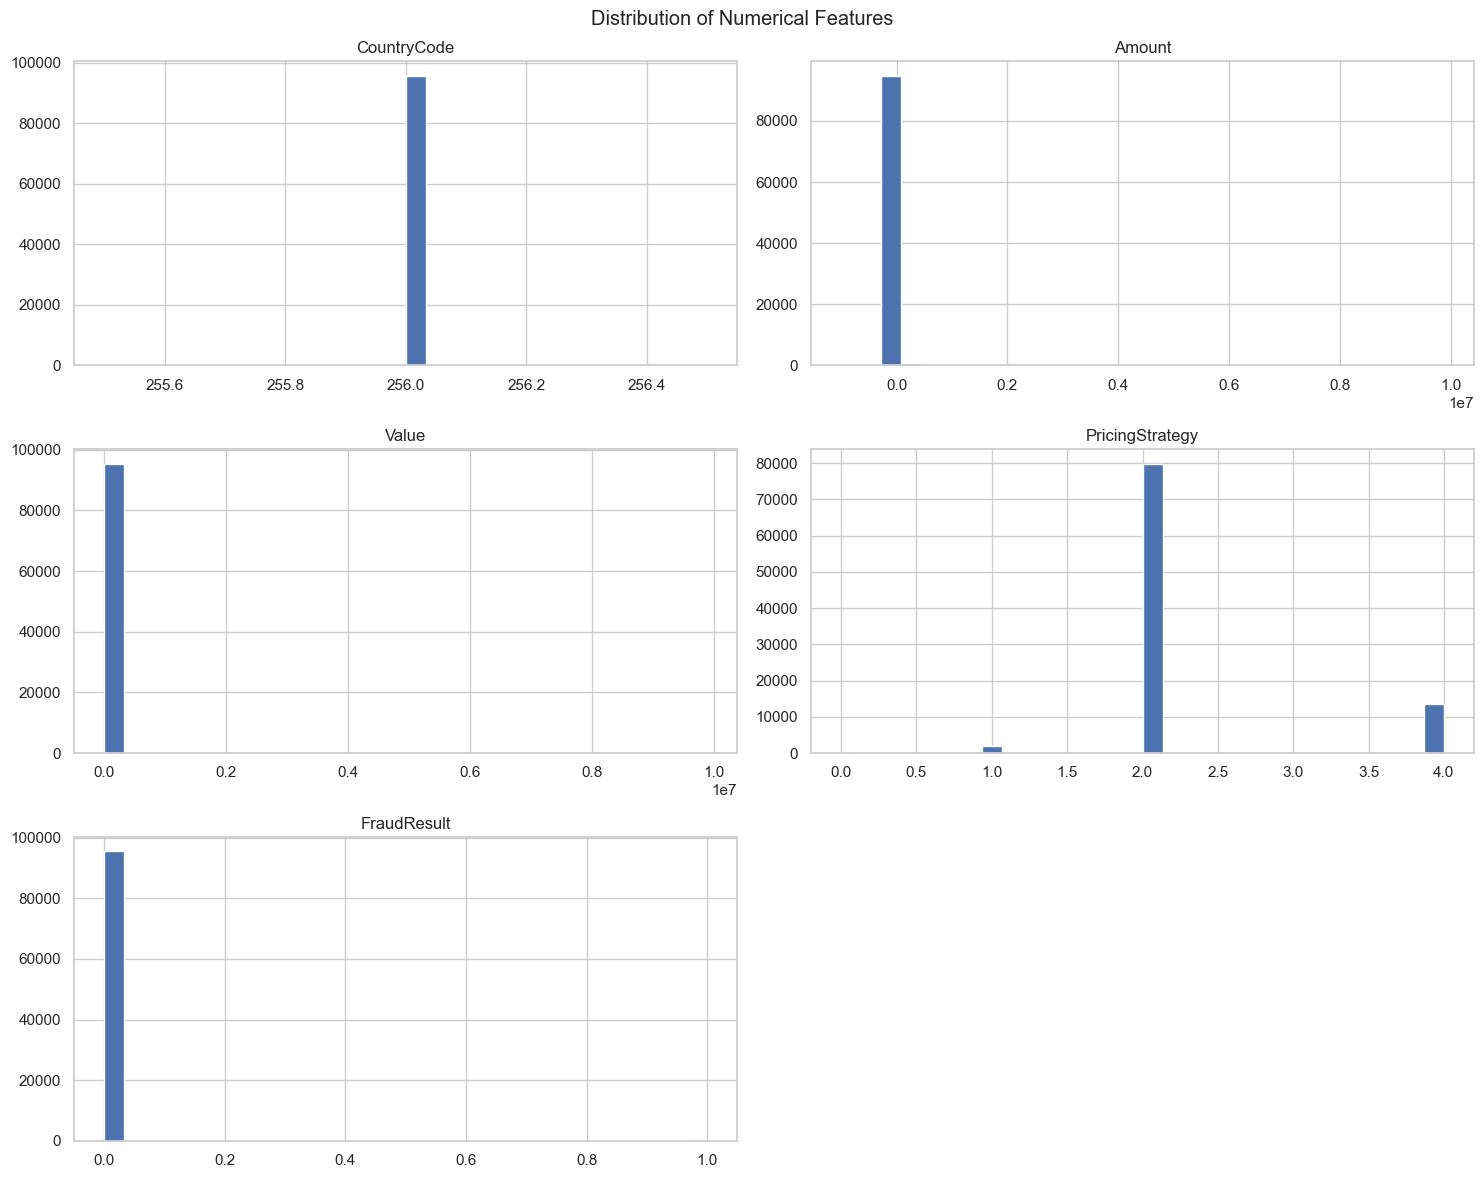

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=30, figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


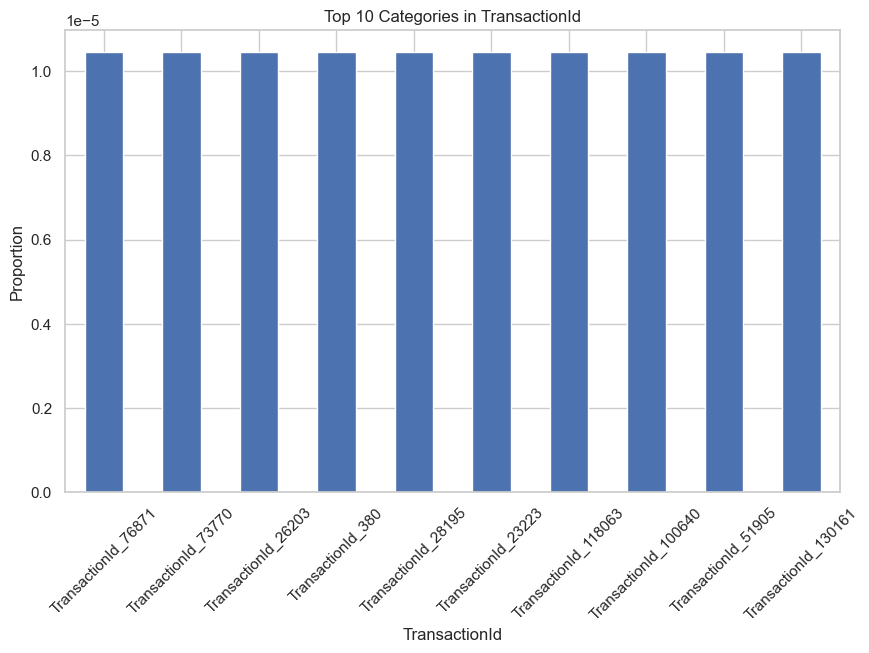

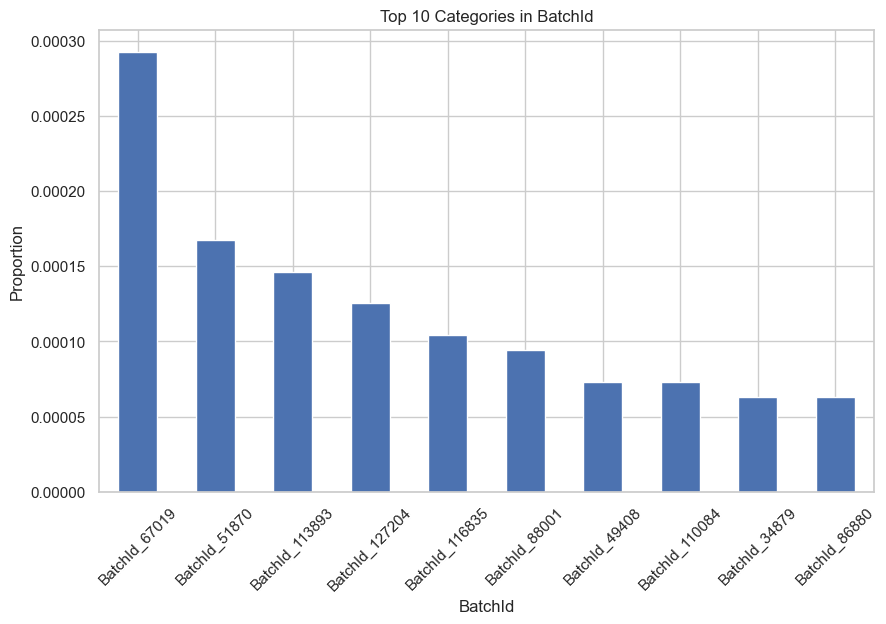

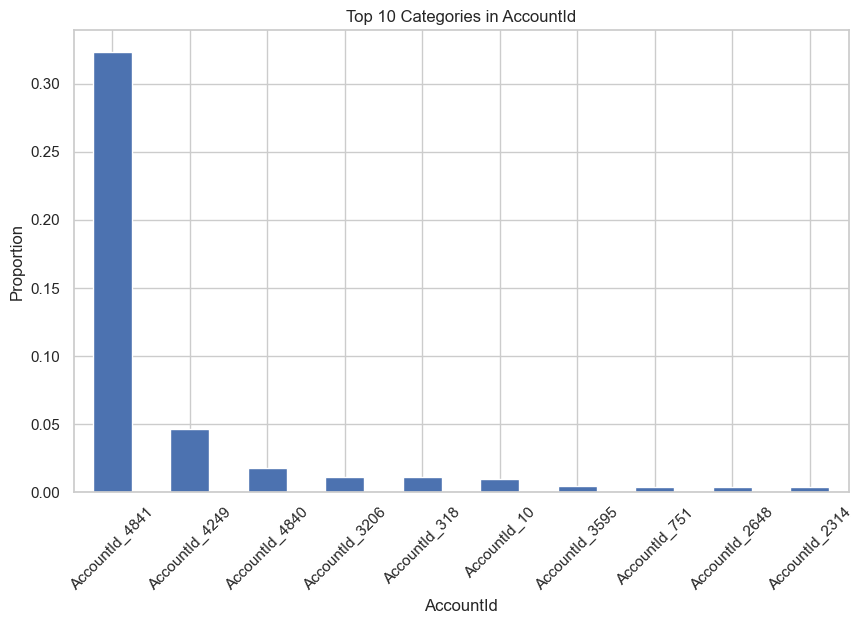

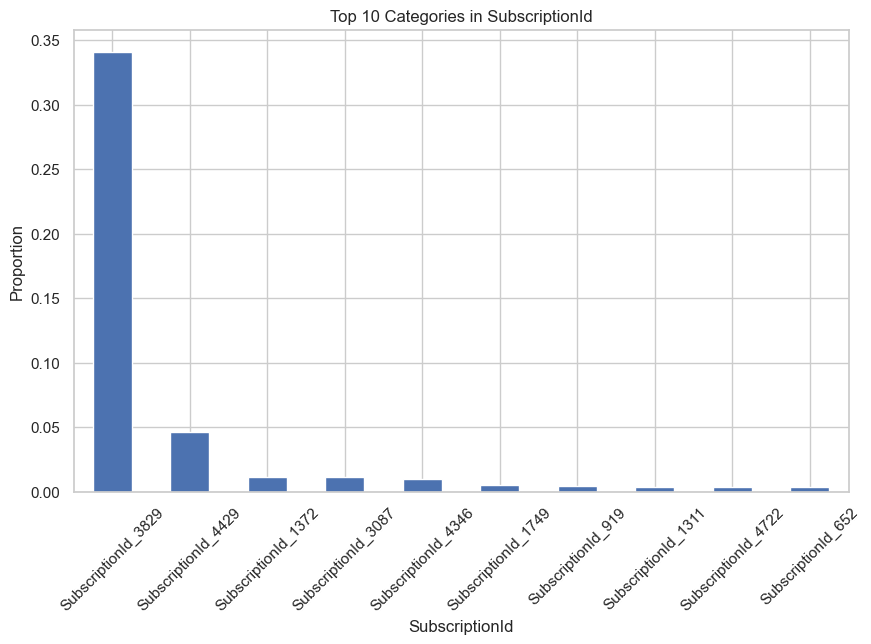

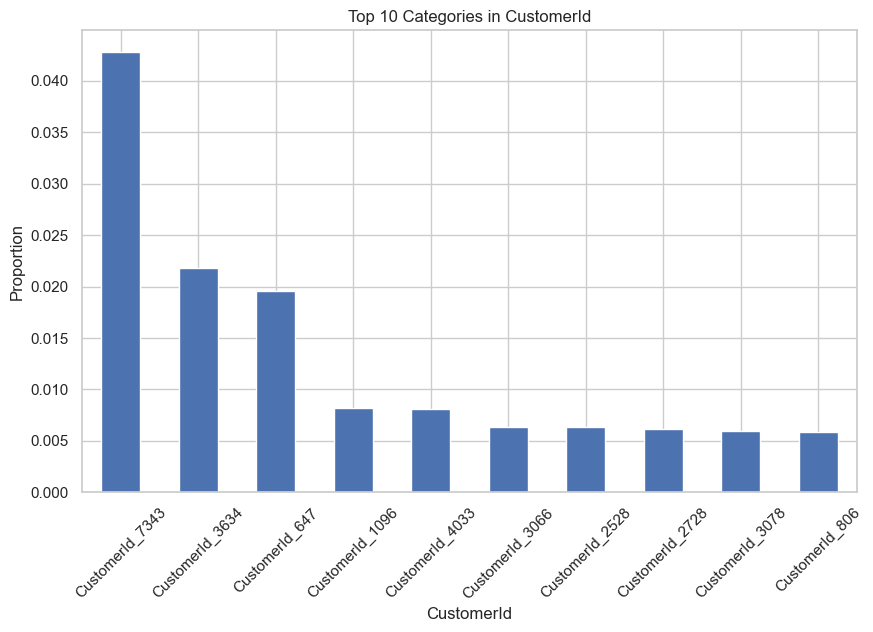

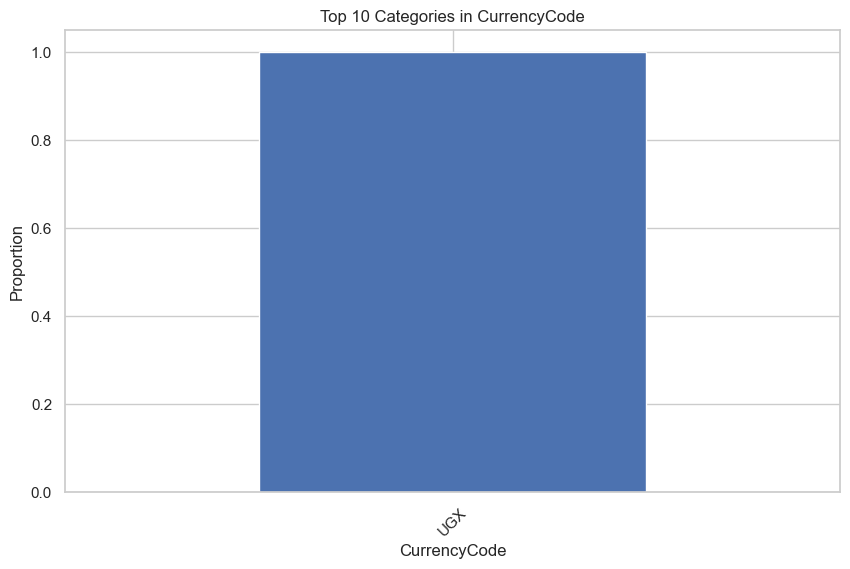

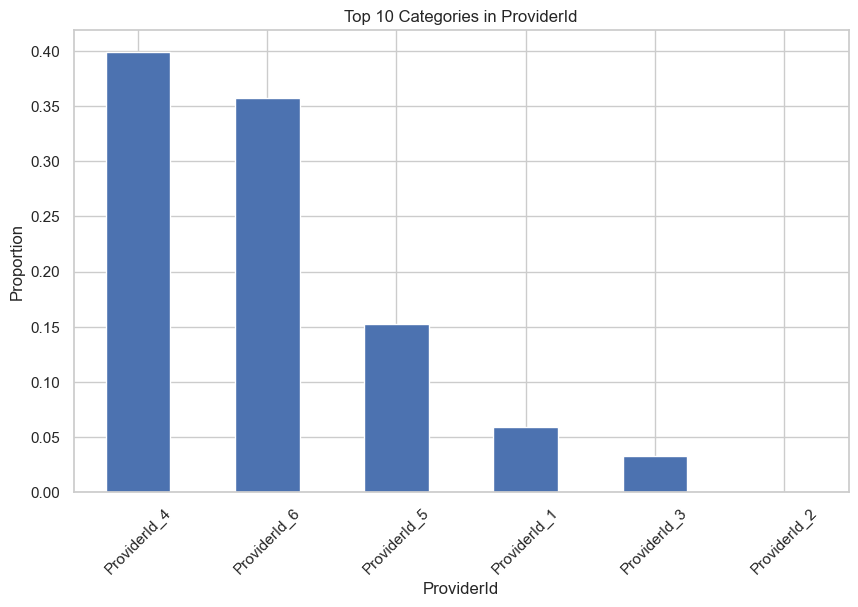

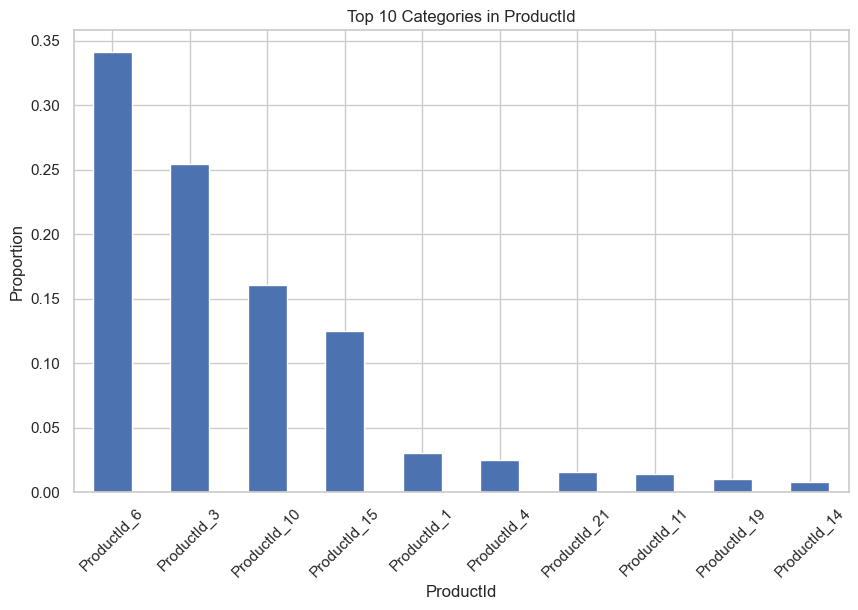

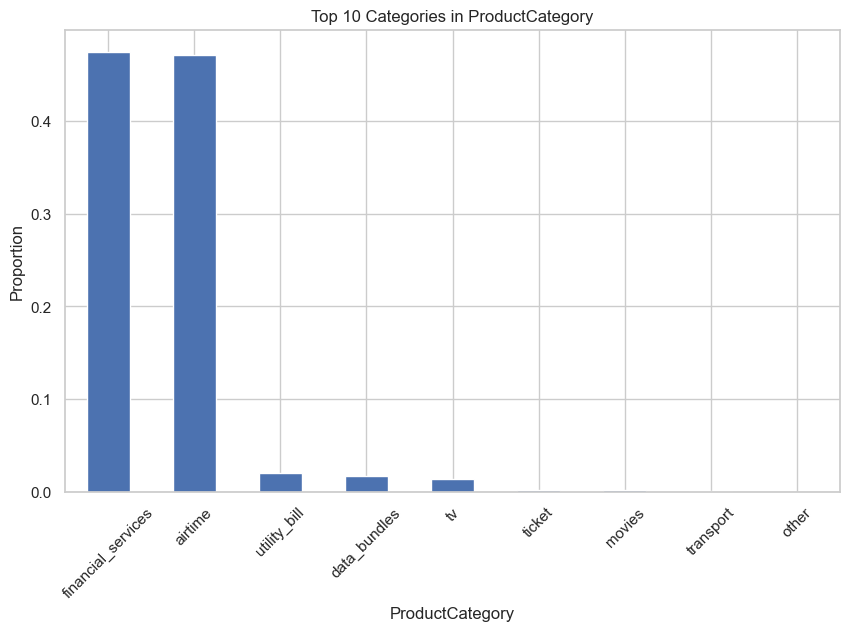

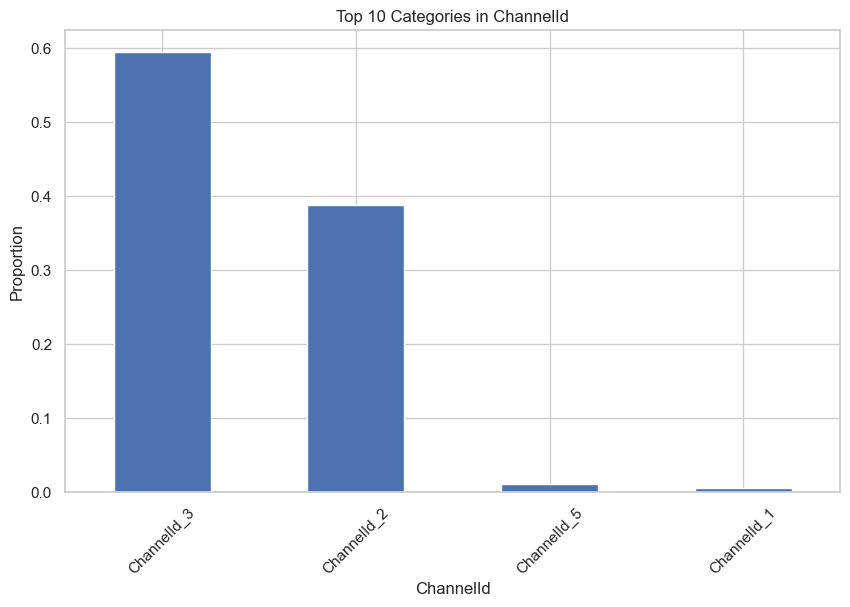

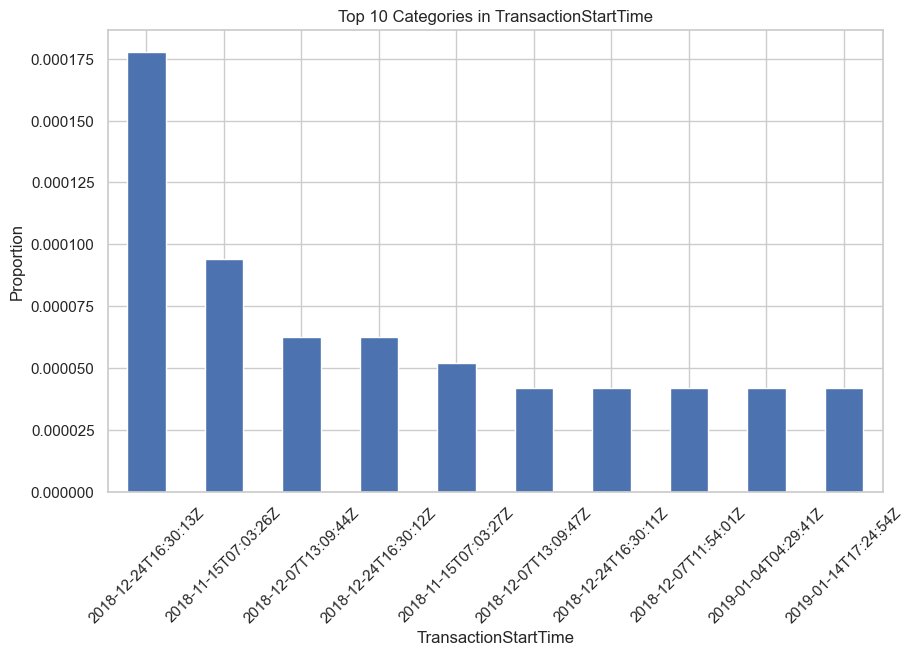

In [8]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure()
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.show()


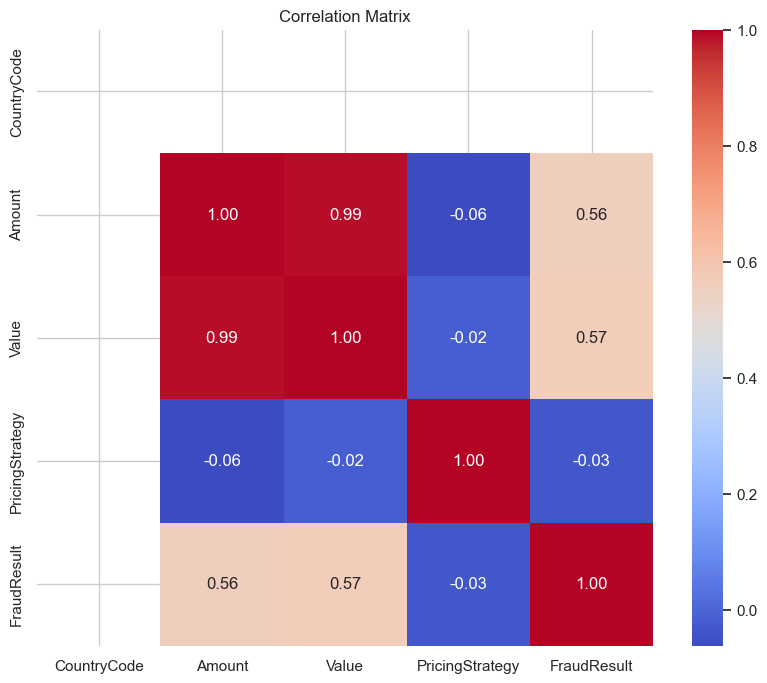

In [9]:
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


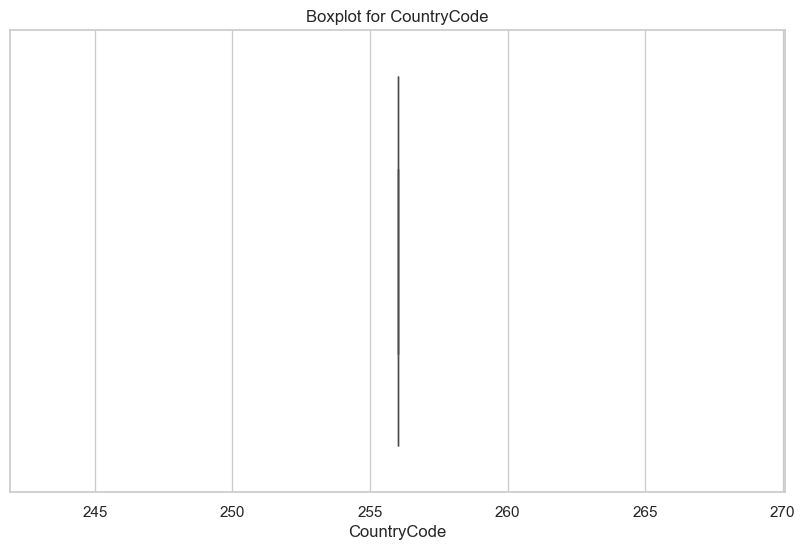

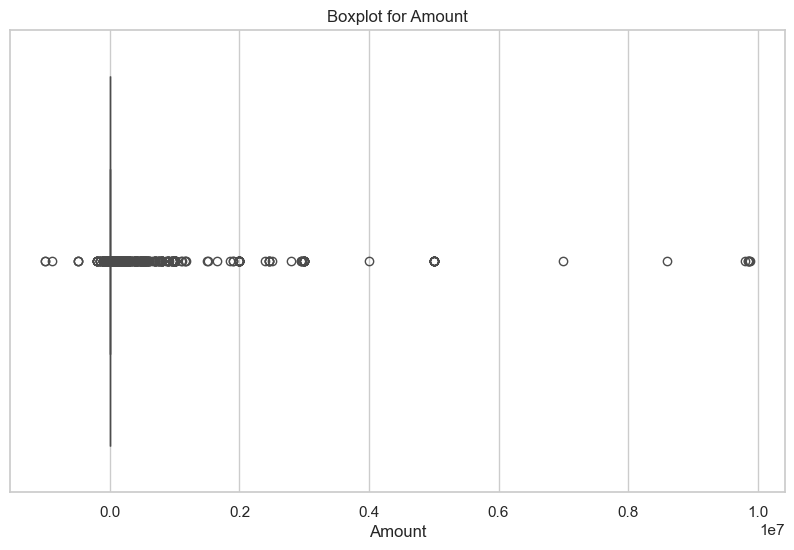

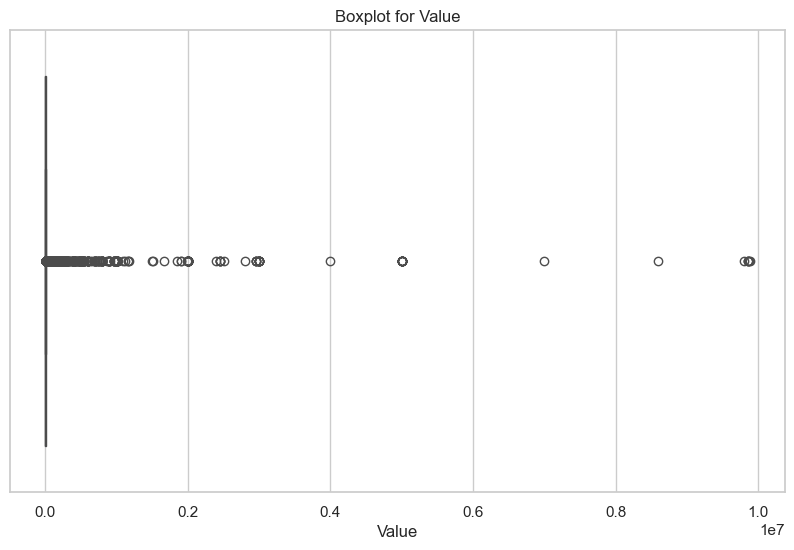

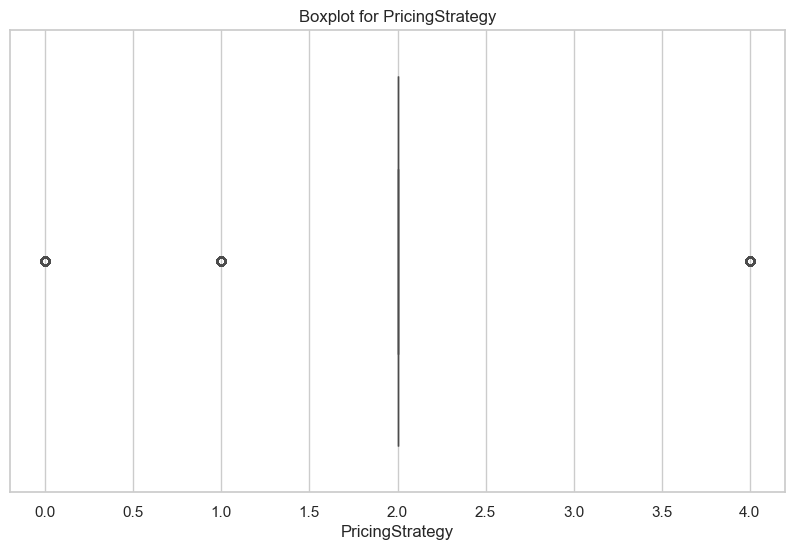

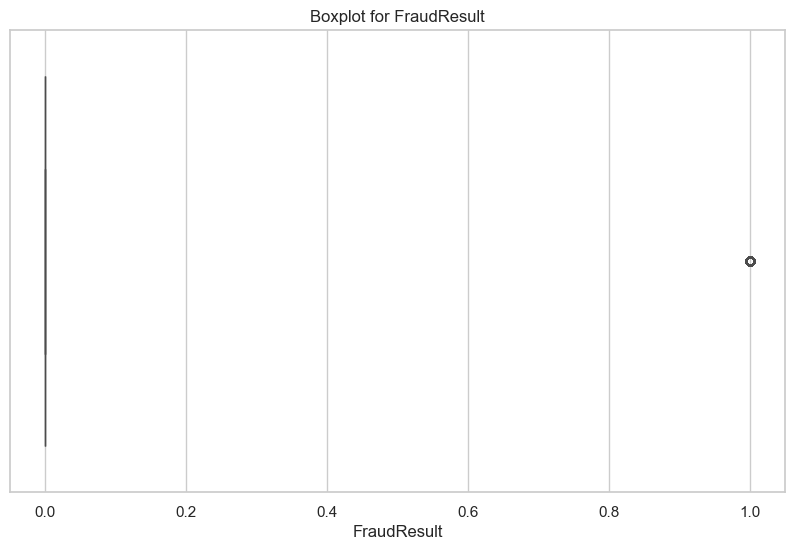

In [10]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


Key Insights from Exploratory Data Analysis
Transaction Amount Skew: The Amount feature is heavily right-skewed, with a few very high transactions. This may require a log transformation for modeling.

Fraud Label Imbalance: The FraudResult column is highly imbalanced, with very few fraud cases. If used, fraud-related features may need resampling or careful weighting.

Channel Usage Concentration: Most customers access the platform through the Android ChannelId, while channels like "Pay Later" are much less frequent. This will affect how we use channel behavior in modeling.

Missing Data: Minimal or no missing values were found in the dataset, indicating good data quality.

Correlation Patterns: Some numerical features (e.g., Amount, Value) are highly correlated, so feature selection or dimensionality reduction might be necessary.